### Gradients:

* We have $X_t, X_{t-1} \in \mathbb{R}^{I \times K}$, $Y_t \in \mathbb{R}^{I \times J}$.

* 
\begin{align}
\nabla_c \log p_\theta(X_t \mid X_{t-1}) 
=
\nabla_c\left \{ \frac{-1}{2 \sigma^2} \| c + \phi X_{t-1} - X_t \|^2 \right \} 
& = 
\frac{-1}{\sigma^2} \left \{ c(IK)^2 + \langle \mathbf{1} \mathbf{1}^\top, \phi X_{t-1} - X_t \rangle \right \} 
\\ 
\nabla_\phi \log p_\theta(X_t \mid X_{t-1}) 
=
\nabla_\phi \left \{ \frac{-1}{2 \sigma^2} \| c + \phi X_{t-1} - X_t \|^2 \right \} 
& = 
\frac{-1}{\sigma^2} \left \{ \phi \|X_{t-1}\|^2 - \langle X_{t-1}, c-X_t \rangle \right \} 
\\
\nabla_{\sigma^2} \log p_\theta(X_t \mid X_{t-1}) 
=
\nabla_{\sigma^2} \left \{ \frac{-1}{2 \sigma^2} \| c + \phi X_{t-1} - X_t \|^2 \right \} 
& = 
\frac{1}{2 \sigma^4} \| c + \phi X_{t-1} - X_t \|^2.
\end{align} 

#### Fix parameters of latent chain.

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, copy
from pylab import plot, show, legend

from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [2]:
T = 50
I = 5  # number of locations
J = 3  # number of species
K = 2   # number of latent factors

In [3]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [4]:
n_particles = 200
alpha_grad, lmbda_grad, c_grad, phi_grad, logsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax=T, Imax=I, Jmax=J, Kmax=K, rep=200)
print("Variance of log-likelihood       :", np.var(logNC,0))
print("Mean of gradient w.r.t. alpha    :", np.mean(alpha_grad,0))
print("Variance of gradient w.r.t. alpha:", np.var(alpha_grad,0))

Variance of log-likelihood       : [1.34403585 1.76013489]
Mean of gradient w.r.t. alpha    : [[  4.33317435 -11.4860476    4.42956224]
 [  4.93657832 -11.65255898   3.6233367 ]]
Variance of gradient w.r.t. alpha: [[2.37585131 0.12031949 2.40477394]
 [8.00512542 0.31773016 7.17287863]]


In [5]:
n_mcmc = 1000
tau = 1e-2*np.ones(5)
update = [1, *np.zeros(4)]
theta_mala, _ = pMCMC_MALA_blockPF(Y, x_0, n_particles, theta, n_mcmc, tau, update, power=1)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
100%|██████████| 1000/1000 [00:56<00:00, 17.69it/s]

19.1 % acceptance rate


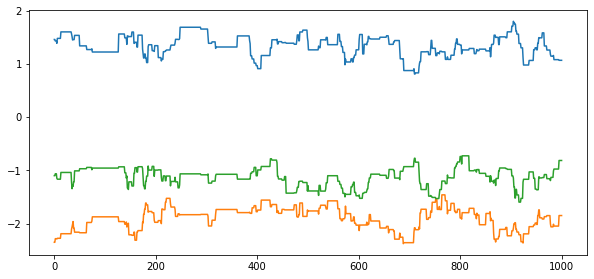

In [7]:
plt.plot(theta_mala[0])

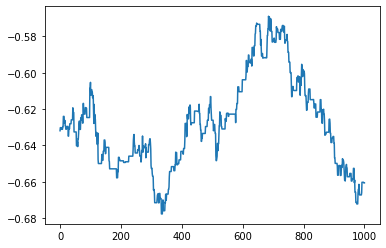

In [37]:
plt.plot(theta_mala[0][:,0])

In [6]:
n_particles = T
n_mcmc = 5_000
eps = 8e-2
scale = [eps*np.ones(J), eps*np.ones((J,K)), eps, eps, eps]
theta_0 = theta

In [7]:
theta_chain, scale, accept_probs = pMCMC_rw(x_0, Y, theta_0, n_particles, n_mcmc, scale, power=1, adapt=True)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
 20%|█▉        | 993/5000 [00:09<00:39, 100.28it/s]/home/postdoc/dsen/Desktop/codes/DC-BATS/ecology/ecology_functions.py:447: RuntimeWarning: invalid value encountered in sqrt
  scale_lmbda = np.sqrt(lmbda_m2 - lmbda_mu**2)*0.7
100%|██████████| 5000/5000 [00:49<00:00, 100.27it/s]

21.74 % acceptance rate


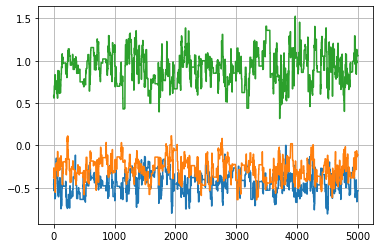

In [8]:
plt.plot(theta_chain[0])
plt.grid(True);

In [11]:
np.std(theta_chain[0],0)

array([0.1275691 , 0.12849777, 0.19223776])